In [324]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

Loading the dataset:

In [325]:
from sqlalchemy import create_engine

In [326]:
host = r'127.0.0.1' # denotes that the db in a local installation
db = r'MSDS610' # db we just created
user = r'postgres' # using the postgres user for this demo
pw = r'adamkhay' # this is the password established during installation
port = r'5432' # default port estabalished during install

In [327]:
db_conn = create_engine("postgresql://{}:{}@{}:{}/{}".format(user, pw, host, port, db))

In [328]:
table_name = r'placementdata_cleaned'
schema = r'cleaned' # schema were the data was loaded last week.

df = pd.read_sql_table(table_name, db_conn, schema)

In [329]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  10000 non-null  int64  
 1   CGPA                       10000 non-null  float64
 2   Internships                10000 non-null  int64  
 3   Projects                   10000 non-null  int64  
 4   Workshops/Certifications   10000 non-null  int64  
 5   AptitudeTestScore          10000 non-null  int64  
 6   SoftSkillsRating           10000 non-null  float64
 7   ExtracurricularActivities  10000 non-null  object 
 8   PlacementTraining          10000 non-null  object 
 9   SSC_Marks                  10000 non-null  int64  
 10  HSC_Marks                  10000 non-null  int64  
 11  PlacementStatus            10000 non-null  object 
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB
None


In [330]:
print(df.head(5))

   StudentID  CGPA  Internships  Projects  Workshops/Certifications  \
0          1   7.5            1         1                         1   
1          2   8.9            0         3                         2   
2          3   7.3            1         2                         2   
3          4   7.5            1         1                         2   
4          5   8.3            1         2                         2   

   AptitudeTestScore  SoftSkillsRating ExtracurricularActivities  \
0                 65               4.4                        No   
1                 90               4.0                       Yes   
2                 82               4.8                       Yes   
3                 85               4.4                       Yes   
4                 86               4.5                       Yes   

  PlacementTraining  SSC_Marks  HSC_Marks PlacementStatus  
0                No         61         79       NotPlaced  
1               Yes         78         82   

the analytical question that I will use in MLS setting: Predicting Placement Status of Students using Academic and Extracurricular Factors.


the features that would support my analysis: CGPA (will hel me because it shows the student's overall grades), Internships (beacause it shows how many internships a student has completed), Projects (depicts the Number of projects completed by the student), Aptitude Test Score (as this is the score of the student's logical reasoning and quantitative reasoning), Soft Skill Rating (this feature wil also help because it is the Rating of the student’s soft skills (5.0 is the max rating), and Extracurricular Activities (that shows Whether or not the student does extracurricular activities which will also suport my analysis)

I just want to have an idea here about how many times a value is repeated 

In [331]:
df.Internships.value_counts()

Internships
1    5542
2    2475
0    1983
Name: count, dtype: int64

In [332]:
df.Projects.value_counts()

Projects
3    3873
1    3547
2    2550
0      30
Name: count, dtype: int64

In [333]:
df.ExtracurricularActivities.value_counts()

ExtracurricularActivities
Yes    5854
No     4146
Name: count, dtype: int64

In [334]:
df.PlacementTraining.value_counts()

PlacementTraining
Yes    7318
No     2682
Name: count, dtype: int64

In [335]:
# Create a new feature and dropping the old one 
df['has_done_extracurricular'] = df['ExtracurricularActivities'].apply(lambda x: 1 if x.strip().lower() == 'yes' else 0)
df.drop('ExtracurricularActivities', axis=1, inplace=True)

In [336]:
# Create a new feature and dropping the old one 
df['has_done_placementtraining'] = df['PlacementTraining'].apply(lambda x: 1 if x.strip().lower() == 'yes' else 0)
df.drop('PlacementTraining', axis=1, inplace=True)

In [337]:
print(df.head(5))

   StudentID  CGPA  Internships  Projects  Workshops/Certifications  \
0          1   7.5            1         1                         1   
1          2   8.9            0         3                         2   
2          3   7.3            1         2                         2   
3          4   7.5            1         1                         2   
4          5   8.3            1         2                         2   

   AptitudeTestScore  SoftSkillsRating  SSC_Marks  HSC_Marks PlacementStatus  \
0                 65               4.4         61         79       NotPlaced   
1                 90               4.0         78         82          Placed   
2                 82               4.8         79         80       NotPlaced   
3                 85               4.4         81         80          Placed   
4                 86               4.5         74         88          Placed   

   has_done_extracurricular  has_done_placementtraining  
0                         0       

now, all the features contain numerical values 

RandomForrest model to investigate the analytical question.

In [338]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


In [339]:
# Ensure all column names are strings
X.columns = X.columns.astype(str)

In [340]:
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

In [341]:
df.columns = df.columns.str.replace(r"[^\w\s]", "_", regex=True)  # Replace non-alphanumeric characters
df.columns = df.columns.str.replace(" ", "_")  # Replace spaces with underscores

here we changed Workshops/Certifications into Workshops_Certifications 

In [342]:
print(df.head(5))

   StudentID  CGPA  Internships  Projects  Workshops_Certifications  \
0          1   7.5            1         1                         1   
1          2   8.9            0         3                         2   
2          3   7.3            1         2                         2   
3          4   7.5            1         1                         2   
4          5   8.3            1         2                         2   

   AptitudeTestScore  SoftSkillsRating  SSC_Marks  HSC_Marks PlacementStatus  \
0                 65               4.4         61         79       NotPlaced   
1                 90               4.0         78         82          Placed   
2                 82               4.8         79         80       NotPlaced   
3                 85               4.4         81         80          Placed   
4                 86               4.5         74         88          Placed   

   has_done_extracurricular  has_done_placementtraining  
0                         0       

In [343]:
features = ["CGPA", "Internships", "Projects", "AptitudeTestScore", "SoftSkillsRating", "has_done_extracurricular"]
target = "PlacementStatus"

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [344]:
print(type(X_train))  # Should be <class 'pandas.DataFrame'>
print(type(y_train))  # Should be <class 'pandas.Series'>


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [345]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [346]:
from sklearn.metrics import accuracy_score, classification_report

In [347]:
# Splitting data into training and testing sets
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training a Random Forest classification model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [348]:
# Feature Importance
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

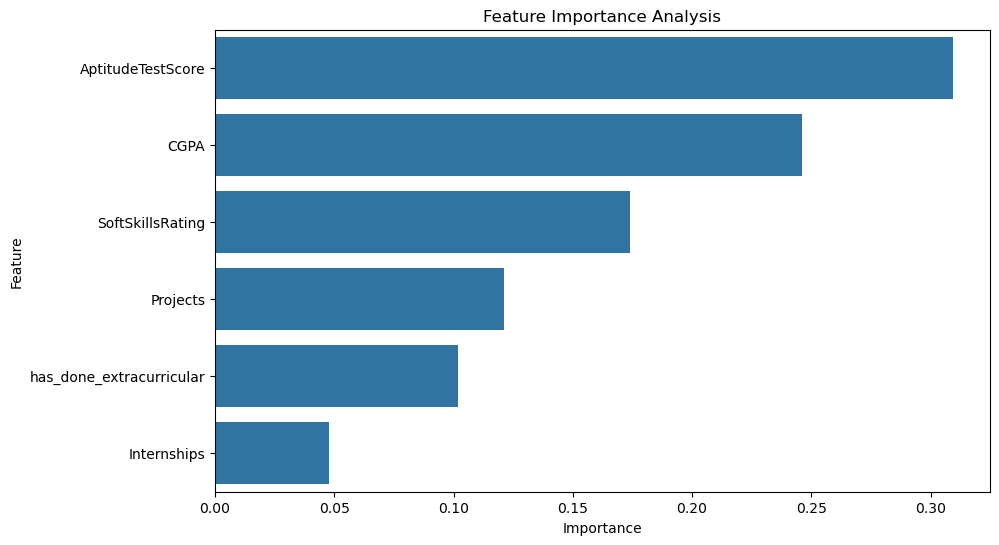

In [349]:
# Plot Feature Importance
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title("Feature Importance Analysis")
plt.show()

other ways to evaluate the performance of my features

Permutation Feature Importance (PIMP)

it measures how much shuffling each feature's values affects model performance.

In [365]:
from sklearn.inspection import permutation_importance

# Compute permutation importance
perm_importance = permutation_importance(rf_model, X_test, y_test, n_repeats=10, random_state=42)

# Convert to DataFrame
perm_importance_df = pd.DataFrame({"Feature": X.columns, "Importance": perm_importance.importances_mean})
perm_importance_df = perm_importance_df.sort_values(by="Importance", ascending=False)

# Display
print(perm_importance_df)


                    Feature  Importance
3         AptitudeTestScore     0.05705
2                  Projects     0.03130
5  has_done_extracurricular     0.03030
0                      CGPA     0.01190
4          SoftSkillsRating     0.00610
1               Internships    -0.00430


Mutual Information (MI)

it measures how much each feature contributes to predicting the target.

In [366]:
from sklearn.feature_selection import mutual_info_classif

# Compute mutual information
mi_scores = mutual_info_classif(X_train, y_train)

# Create DataFrame
mi_df = pd.DataFrame({"Feature": X.columns, "Importance": mi_scores})
mi_df = mi_df.sort_values(by="Importance", ascending=False)

print(mi_df)


                    Feature  Importance
3         AptitudeTestScore    0.160591
2                  Projects    0.134164
4          SoftSkillsRating    0.119641
5  has_done_extracurricular    0.118553
0                      CGPA    0.109390
1               Internships    0.051036


Provide a summary that recaps your analytical question, the features you created, the performance of your features and your overall insights about using those features in your analysis. Also, address any concerns with overfitting/redundancy amongst the feature set.


The goal of my analysis is to predict student's placement status using a mix of training experiences, extracurricular activities, and academic achievement. I wanted to find out which elements had the biggest impact on a student's ability to get employment by using machine learning.

Using categorical data, I developed new features to improve prediction power: 

If the student took part in extracurricular activities, the value of has_done_extracurricular is 1, otherwise it is 0. Besides, the feature has_done_placementtraining shows 1 if the student finished placement training and 0 otherwise

I also carried out feature cleaning, substituting underscores for non-alphanumeric characters and spaces in column names to ensure compatibility with ML models.

I examined Feature importance using these methods:
1.	Random Forest Feature Importances: it presented AptitudeTestScore and CGPA as the most important features 
2.	Permutation Importance: showed that AptitudeTestScore and Projects were the strongest predictors.
3.	Mutual Information (MI): confirmed as well that Projects and AptitudeTestScore as the strongest factors.
Taking into consideration what Random Forest Feature Importance, PIMP, and MI presented, I would focus more on AptitudeTestScore, Projects, and CGPA as the main features for my analysis 
For Overfitting & Feature Redundancy Concerns, I believe there was a strong correlation between CGPA and AptitudeTestScore, suggesting that one may be adequate. Additionally, there was a correlation between internships and projects, which may indicate that they capture similar skills.

When it comes to Feature Redundancy, after accounting for CGPA and internships, placement training's distinctive contribution was negligible, and internships by themselves had no noticeable impact on placement results.
My other concern is overfitting. This latter can be caused by using too many redundant features, in this case, Model efficiency may be increased via feature selection or regularization techniques.
